Importamos las liberias.

In [228]:
import pandas as pd
import joblib
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Hacemos la lectura de todos los datasets.

Data 2015

In [229]:
data_2015_csv = '../Datasets/2015.csv' 
data_2015 = pd.read_csv(data_2015_csv, delimiter=',') 
print(data_2015.head())
print(data_2015.info())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

Data 2016

In [230]:
data_2016_csv = '../Datasets/2016.csv' 
data_2016 = pd.read_csv(data_2016_csv, delimiter=',') 
print(data_2016.head())
print(data_2016.info())

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

Data 2017

In [231]:
data_2017_csv = '../Datasets/2017.csv' 
data_2017 = pd.read_csv(data_2017_csv, delimiter=',') 
print(data_2017.head())
print(data_2017.info())

       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0 

Data 2018

In [232]:
data_2018_csv = '../Datasets/2018.csv' 
data_2018 = pd.read_csv(data_2018_csv, delimiter=',') 
print(data_2018.head())
print(data_2018.info())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                

Data 2019

In [233]:
data_2019_csv = '../Datasets/2019.csv' 
data_2019 = pd.read_csv(data_2019_csv, delimiter=',') 
print(data_2019.head())
print(data_2019.info())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

Este código añade una columna de "Year" a cada DataFrame para identificar el año correspondiente.

In [234]:
# Lista de DataFrames y lista de nombres estandarizados
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019]

# Ciclo para agregar columna de "Year" y estandarizar columnas en cada DataFrame
for index, dataframe in enumerate(dataframes):
    current_year = 2015 + index
    dataframe['Year'] = current_year  # Añadir la columna del año

Renombramos  las columnas en cada DataFrame según el formato específico de ese año para estandarizarlas.

In [235]:
# Lista de DataFrames y lista de nombres estandarizados
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019]

In [236]:
# Ciclo para agregar columna de "Year" y estandarizar columnas en cada DataFrame
for index, dataframe in enumerate(dataframes):
    current_year = 2015 + index
    dataframe['Year'] = current_year  # Añadir la columna del año
    
    # Renombrar columnas en función del año
    if current_year == 2015:
        dataframe.columns = [
            "Country", "Region", "Happiness Rank", "Happiness Score", "Standard Error",
            "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
            "Trust (Government Corruption)", "Generosity", "Dystopia Residual", "Year"
        ]
    elif current_year == 2016:
        dataframe.columns = [
            "Country", "Region", "Happiness Rank", "Happiness Score",
            "Lower Confidence Interval", "Upper Confidence Interval",
            "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
            "Trust (Government Corruption)", "Generosity", "Dystopia Residual", "Year"
        ]
    elif current_year == 2017:
        dataframe.columns = [
            "Country", "Happiness Rank", "Happiness Score", "Whisker High", "Whisker Low",
            "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
            "Generosity", "Trust (Government Corruption)", "Dystopia Residual", "Year"
        ]
    elif current_year in [2018, 2019]:
        dataframe.columns = [
            "Happiness Rank", "Country", "Happiness Score", "Economy (GDP per Capita)", 
            "Family", "Health (Life Expectancy)", "Freedom", "Generosity", 
            "Trust (Government Corruption)", "Year"
        ]

Combinamos todos los DataFrames en uno solo, alineando los datos de diferentes años.

In [237]:
# Combinar todos los DataFrames en uno solo
new_data = pd.concat(dataframes, ignore_index=True, sort=False)

In [238]:
new_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker High,Whisker Low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


Calculamos la mediana de las columnas `"Dystopia Residual"` y `"Trust (Government Corruption)"`. Luego, usa esas medianas para reemplazar los valores nulos en ambas columnas.

In [239]:
# Rellenar valores nulos en "Dystopia Residual" y "Trust (Government Corruption)" con la mediana
dystopia_median = new_data["Dystopia Residual"].median()
trust_median = new_data["Trust (Government Corruption)"].median()

new_data["Dystopia Residual"] = new_data["Dystopia Residual"].fillna(dystopia_median)
new_data["Trust (Government Corruption)"] = new_data["Trust (Government Corruption)"].fillna(trust_median)


Resumen estadístico del dataset final.

In [240]:
# Mostrar solo los nombres de las columnas
print("Columnas en new_data:")
print(new_data.columns)


Columnas en new_data:
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Whisker High', 'Whisker Low'],
      dtype='object')


In [241]:
print(new_data.describe())

       Happiness Rank  Happiness Score  Standard Error  \
count      782.000000       782.000000      158.000000   
mean        78.698210         5.379018        0.047885   
std         45.182384         1.127456        0.017146   
min          1.000000         2.693000        0.018480   
25%         40.000000         4.509750        0.037268   
50%         79.000000         5.322000        0.043940   
75%        118.000000         6.189500        0.052300   
max        158.000000         7.769000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                782.000000  782.000000                782.000000   
mean                   0.916047    1.078392                  0.612416   
std                    0.407340    0.329548                  0.248309   
min                    0.000000    0.000000                  0.000000   
25%                    0.606500    0.869363                  0.440183   
50%                    0.982205    1.12

In [242]:
# Borra columnas con valores nulos en el DataFrame
new_data.drop(columns=["Region", "Country", "Happiness Rank", "Standard Error","Lower Confidence Interval","Upper Confidence Interval","Whisker High","Whisker Low"], inplace=True)

Verificación final de la estructura del DataFrame resultante.

In [243]:
new_data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


Vamos a rellenar los valores nulos en las columnas `Dystopia Residual` y `Trust (Government Corruption)` del DataFrame `merged_data` con la mediana de cada columna.

Verificamos los datos estadísticos del dataset final, antes de guardarlo.

In [244]:
new_data.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125392,0.218576,2.093484,2016.993606
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.105756,0.122321,0.438433,1.417364
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000,1.972691,2016.000000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.094640,2017.000000
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.155861,0.278832,2.202105,2018.000000
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000


Verificamos las columnas finales.

In [245]:
print("Columnas:")
print(new_data.columns)

Columnas:
Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')


Estadísticas descriptivas en gráficos que permitan visualizar mejor el dataset.

Histograma de cada variable numérica

<Figure size 1000x600 with 0 Axes>

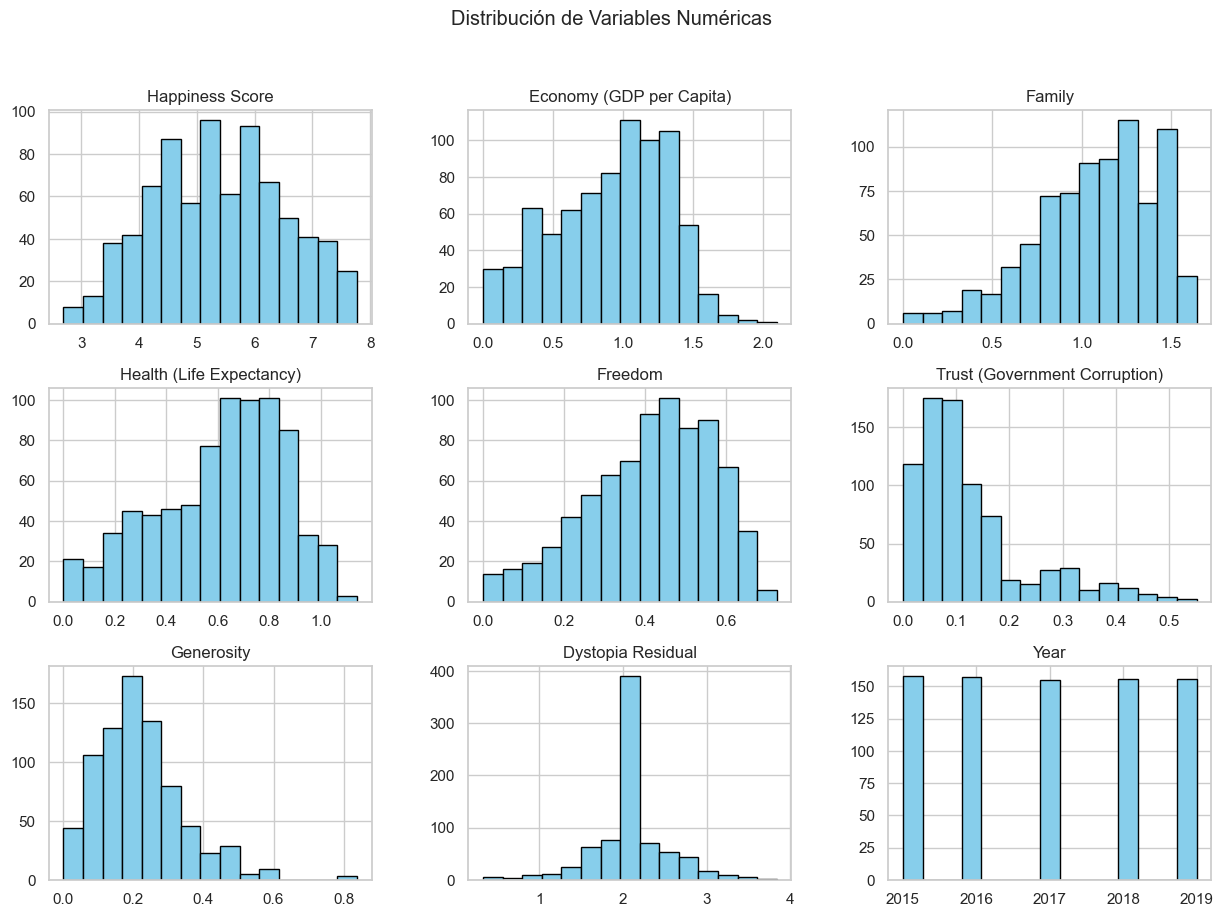

In [246]:
# Configuración general de los gráficos
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

new_data.hist(bins=15, color='skyblue', edgecolor='black', figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

Estos histogramas muestran que:

Happiness Score y Dystopia Residual tienen distribuciones normales.

Economy, Family, y Health están concentrados en valores altos, indicando condiciones socioeconómicas favorables en la mayoría de los países.

Freedom tiene valores moderados, mientras que Trust está concentrado cerca de cero, reflejando baja confianza en el gobierno.

Generosity es baja en la mayoría de los países.

Mapa de calor de la matriz de correlación

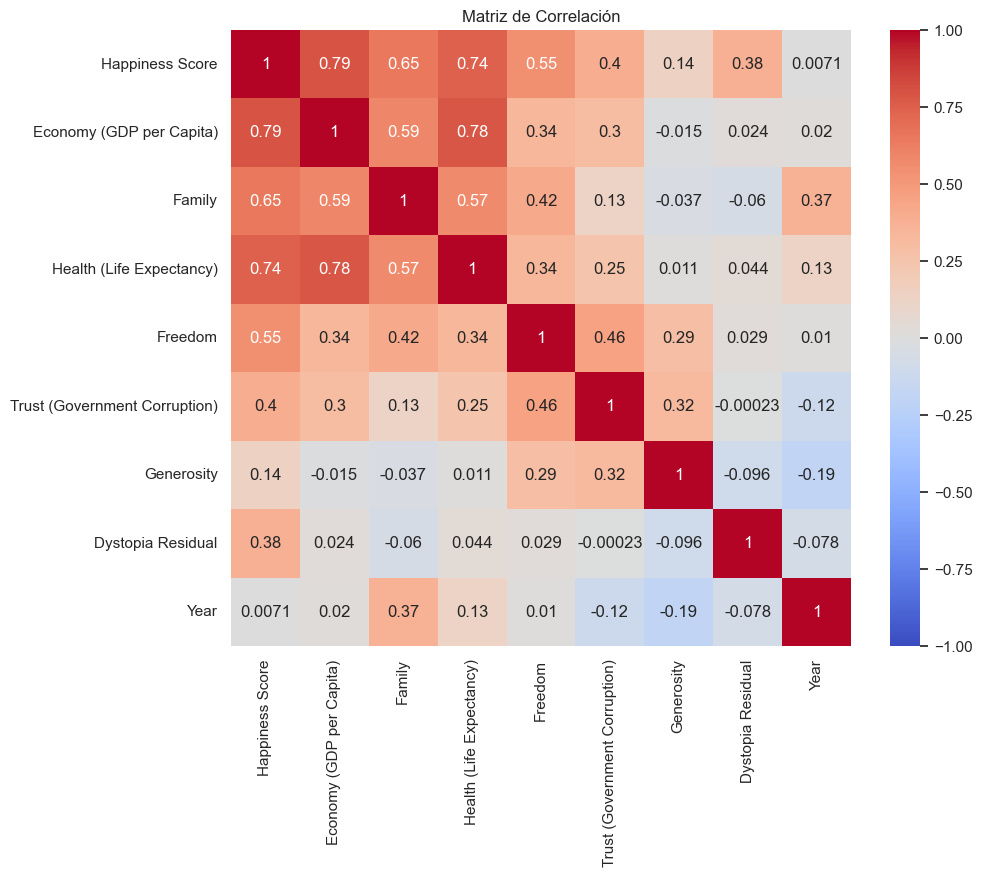

In [247]:
plt.figure(figsize=(10, 8))
correlation_matrix = new_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlación revela que la **felicidad** (Happiness Score) se asocia fuertemente con **economía (PIB per cápita)**, **salud** (esperanza de vida) y **familia** (apoyo social), lo que indica que estos son los factores más influyentes en el nivel de felicidad. Factores como **libertad** y **confianza en el gobierno** tienen una influencia moderada, mientras que **generosidad** muestra una relación muy débil con la felicidad y con las demás variables.

Boxplots para cada variable

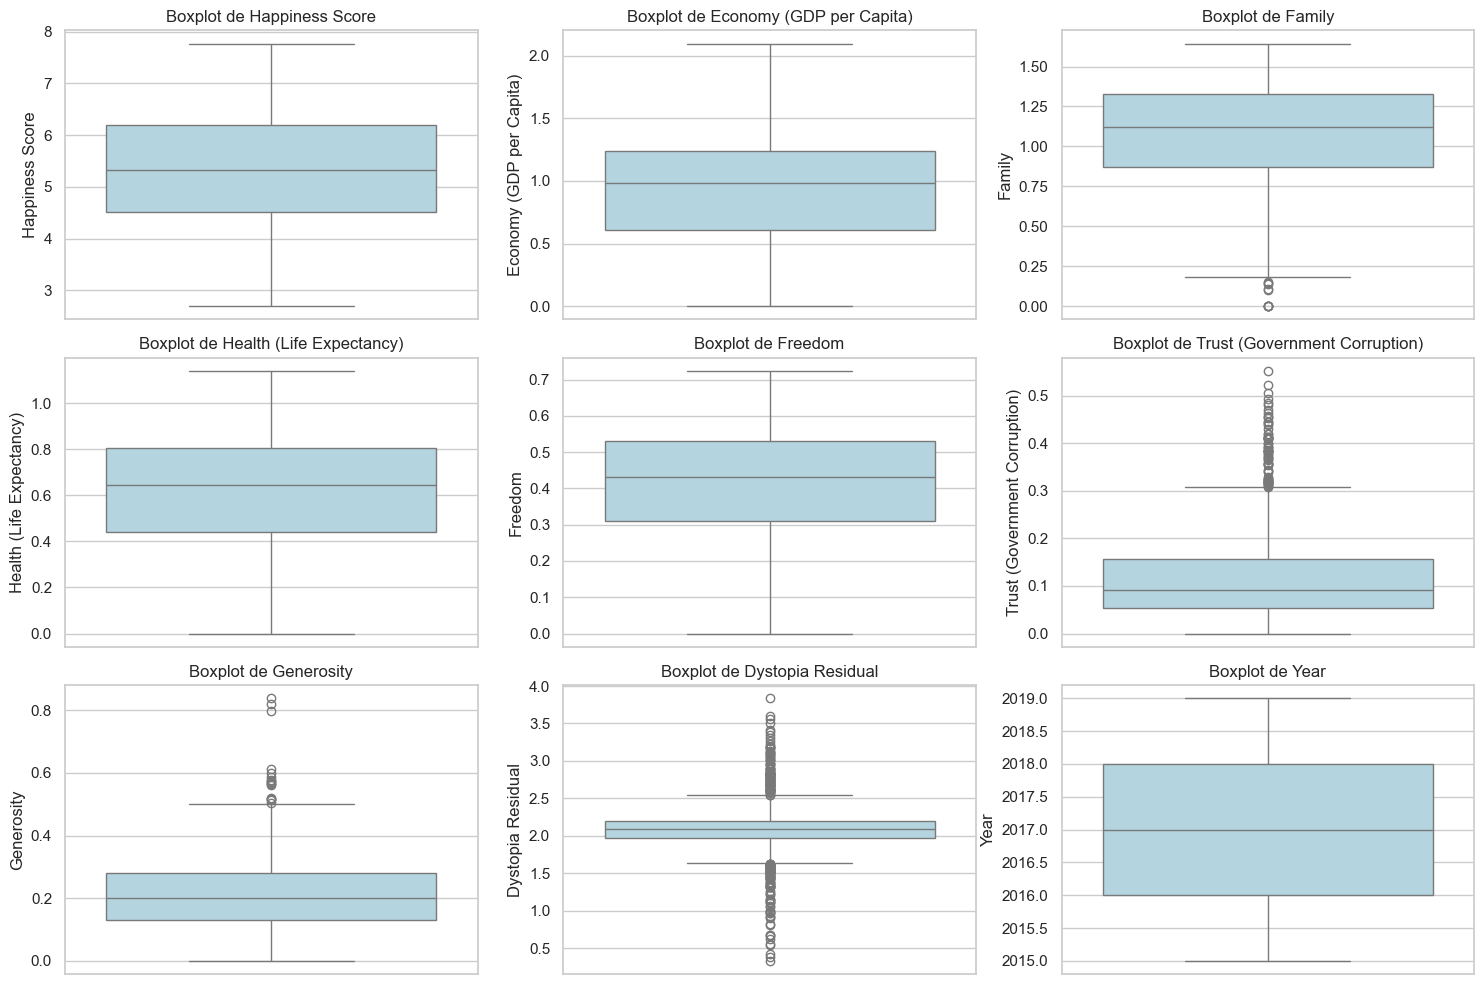

In [248]:
# Configurar el tamaño de la figura y grid para los boxplots
plt.figure(figsize=(15, 10))

# Cambiar el grid a 3x3 para tener espacio para los 9 gráficos
for i, column in enumerate(new_data.columns[:9], 1):  # Cambié 0 a 1 para enumerar desde 1
    plt.subplot(3, 3, i)  # 3x3 grid para acomodar los 9 gráficos
    sns.boxplot(data=new_data[column], color="lightblue")
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

Los boxplots muestran que variables como **Happiness Score**, **Economy**, **Family**, **Health**, y **Freedom** tienen distribuciones simétricas y pocos valores atípicos, mientras que **Trust (Government Corruption)**, **Generosity**, y **Dystopia Residual** presentan varios valores atípicos, especialmente hacia el extremo superior. Esto sugiere que, en algunos países, la corrupción, la generosidad y el nivel de insatisfacción difieren significativamente del promedio, indicando una gran variabilidad en estos factores.

Gráficos de dispersión entre algunas variables clave

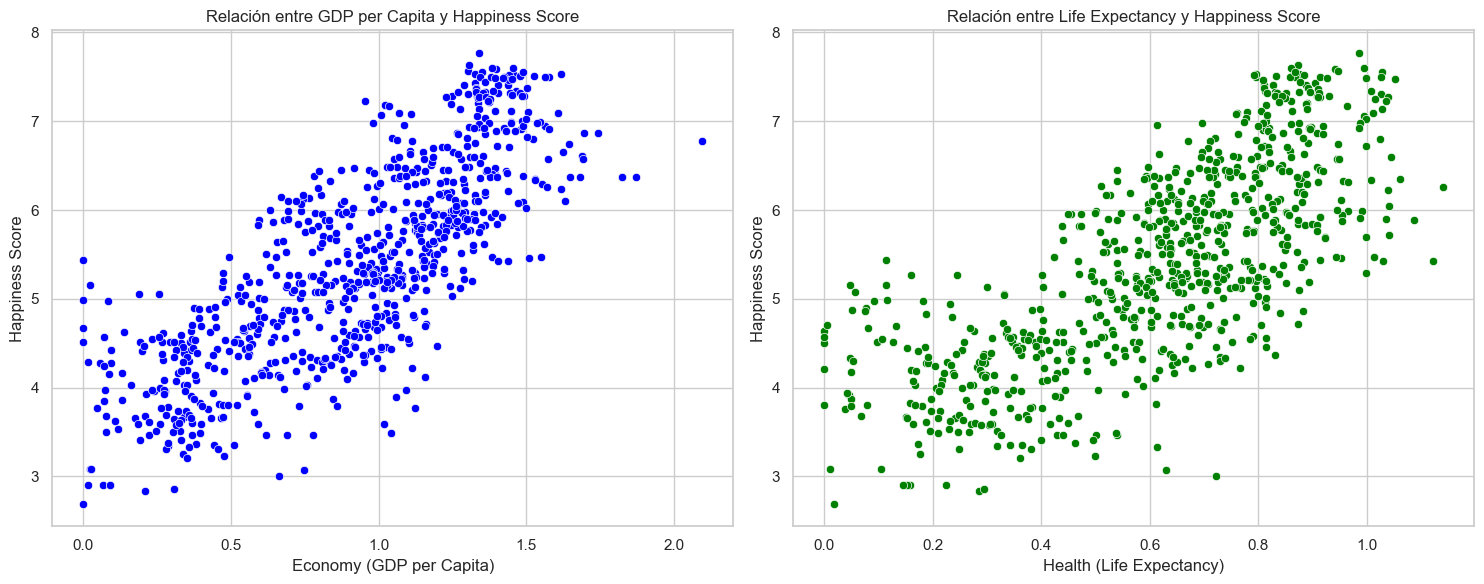

In [249]:
plt.figure(figsize=(15, 6))

# Relación entre GDP y Happiness Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=new_data, x="Economy (GDP per Capita)", y="Happiness Score", color='blue')
plt.title("Relación entre GDP per Capita y Happiness Score")

# Relación entre Health y Happiness Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=new_data, x="Health (Life Expectancy)", y="Happiness Score", color='green')
plt.title("Relación entre Life Expectancy y Happiness Score")

plt.tight_layout()
plt.show()

Los gráficos de dispersión muestran una relación positiva entre **Happiness Score** y tanto **Economy (GDP per Capita)** como **Health (Life Expectancy)**. A medida que el PIB per cápita o la esperanza de vida aumentan, el puntaje de felicidad también tiende a aumentar, lo que indica que la prosperidad económica y la salud son factores clave asociados con mayores niveles de felicidad en los países.

Finalmente exportamos el dataset.

In [250]:
# Guardar el dataset limpio
new_data.to_csv("../Datasets/cleaned.csv", index=False)
print("Dataset guardado.")

Dataset guardado.
